In [1]:
!pip install plotly altair bokeh dash
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Change the content if you are running out of collab in accordance with your environment
file = "/content/cleaned_data.csv"
data = pd.read_csv(file)

data.head()

,Code,Description,Unit_Cost,Unit_Price,Amount_Sold,Margin%,Total_Cost,Total_Sale
0,24513,Avocado In Bulk Kg,5.04,8.39,267.42,40.01,1346.60,2244.54
1,25049,Pineapple Unit,3.73,4.91,986.00,24.05,3674.41,4837.92
2,72665,Pineapple Offer,3.50,0.99,9.00,-253.54,31.50,8.91
3,24541,Pumpkin Cabotia In Bulk Kg,1.18,1.66,1474.74,28.46,1746.97,2442.07
4,63614,Pumpkin Cabotia Packed Kg,1.20,2.46,502.74,51.29,601.59,1235.17


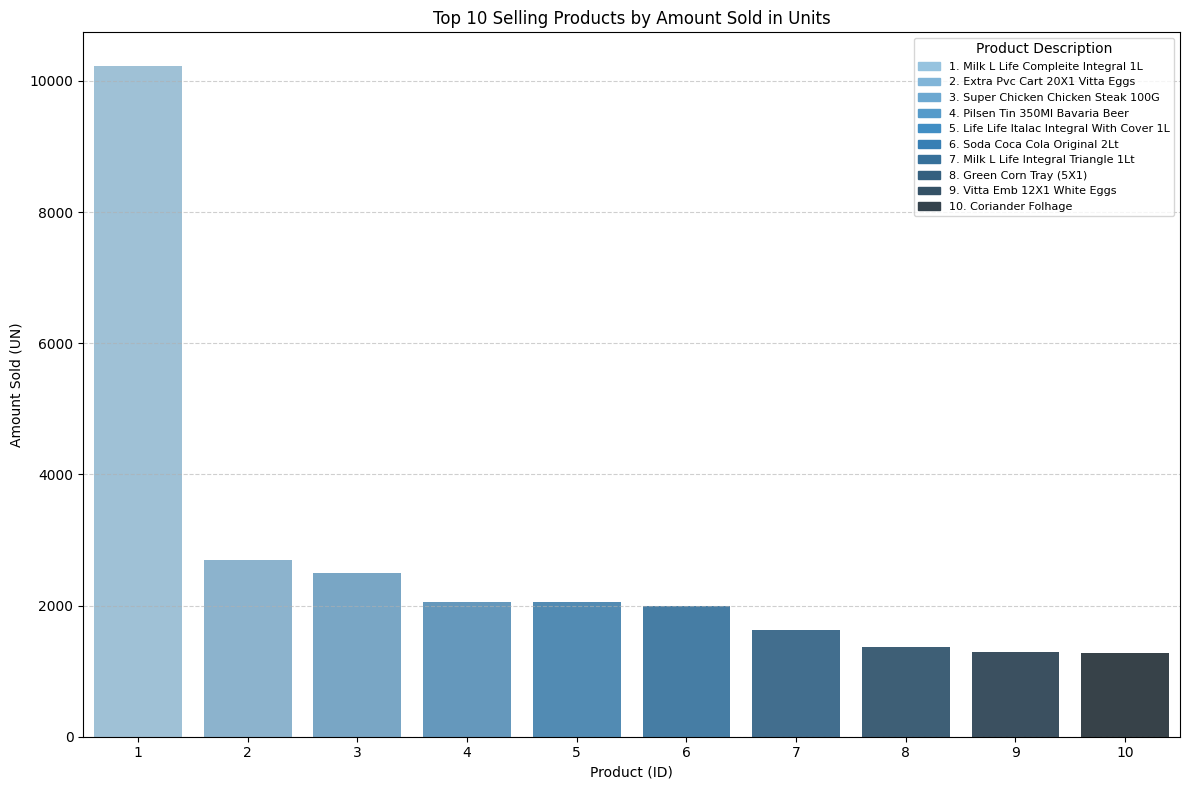

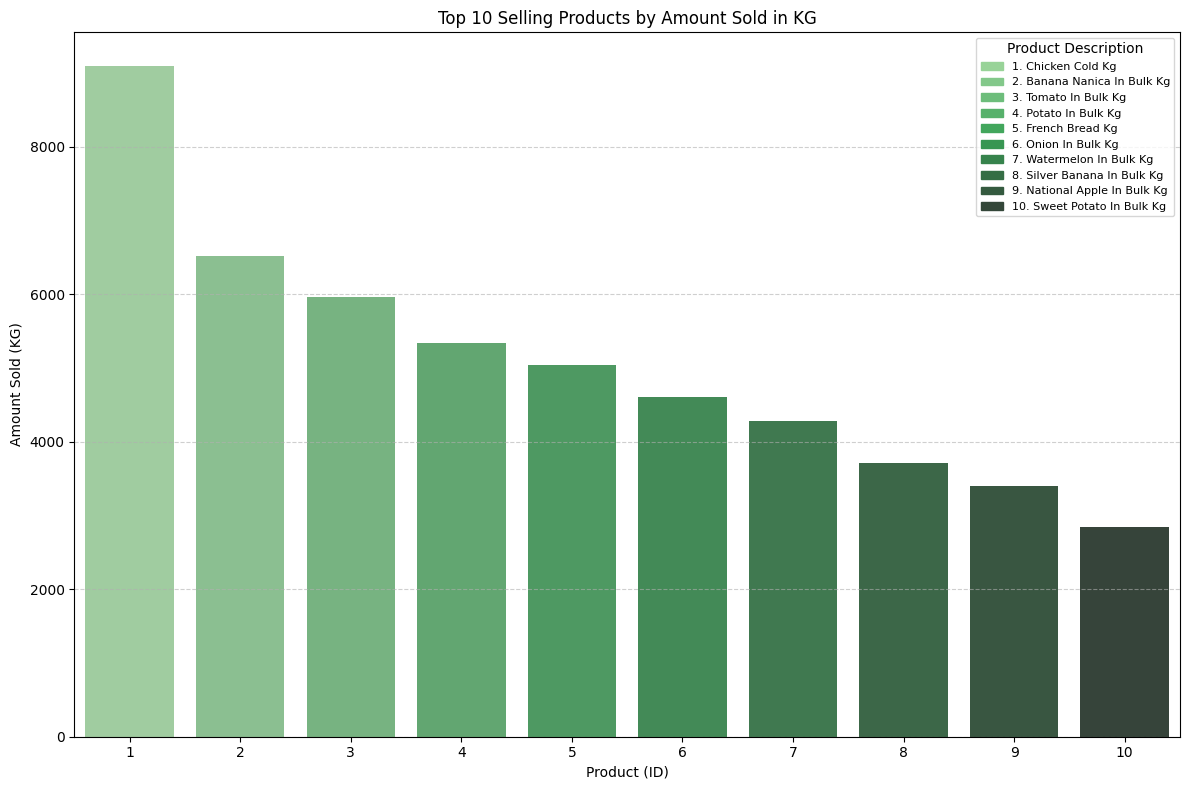

In [4]:
# Creating visualizations of the best-selling products in KG and Unit

# I decided to start with a bar chart due its simplicity and suitable representation of the specific feature

import matplotlib.patches as mpatches

# Separating the data
# .copy() avoids warnings, bugs, and accidental changes to the original DataFrame
unit = data[~data['Description'].str.contains('kg', case=False)].copy()
kg = data[data['Description'].str.contains('kg', case=False)].copy()

# Sorting top 10 of each category
best_selling_unit = unit.sort_values(by='Amount_Sold', ascending=False).head(10).copy()
best_selling_unit['Product_ID'] = range(1, 11)

best_selling_kg = kg.sort_values(by='Amount_Sold', ascending=False).head(10).copy()
best_selling_kg['Product_ID'] = range(1, 11)

# Defining collors patterns
colors_unit = sns.color_palette('Blues_d', n_colors=10)
colors_kg = sns.color_palette('Greens_d', n_colors=10)

# Creating function to plot barplot
def plot_best_selling(data, title, ylabel, palette):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=data, x='Product_ID', y='Amount_Sold', hue='Product_ID', palette=palette, legend=False)
    plt.title(title)
    plt.xlabel('Product (ID)')
    plt.ylabel(ylabel)

    # Defining the legend
    legend_labels = [
        f"{row['Product_ID']}. {row['Description']}" for _, row in data.iterrows()
    ]
    legend_handles = [mpatches.Patch(color=palette[i], label=legend_labels[i]) for i in range(len(data))]

    plt.legend(handles=legend_handles, title="Product Description", loc='upper right', title_fontsize=10, fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plotting for Unit
plot_best_selling(
    data=best_selling_unit,
    title='Top 10 Selling Products by Amount Sold in Units',
    ylabel='Amount Sold (UN)',
    palette=colors_unit
)

# Plotting for KG
plot_best_selling(
    data=best_selling_kg,
    title='Top 10 Selling Products by Amount Sold in KG',
    ylabel='Amount Sold (KG)',
    palette=colors_kg
)

📊 Best-Selling Products by Amount Sold

This chart displays the top products based on the total quantity sold. It helps identify which items are most popular among customers, regardless of their price or profitability. Understanding these products can guide decisions on stock management and promotional strategies, or even finding ways to improve their final profit if it is necessary.

In [5]:
# Creating a function to print summary statistics for all charts

# Defining the function
def print_summary_stats(df, value_column, category_name):
    print(f"\nSummary Statistics for {category_name}:")
    total = df[value_column].sum()
    mean = df[value_column].mean()
    median = df[value_column].median()
    min_val = df[value_column].min()
    max_val = df[value_column].max()
    std_dev = df[value_column].std()

    print(f"Total {value_column}: {total:,.2f}")
    print(f"Mean {value_column}: {mean:,.2f}")
    print(f"Median {value_column}: {median:,.2f}")
    print(f"Min {value_column}: {min_val:,.2f}")
    print(f"Max {value_column}: {max_val:,.2f}")
    print(f"Standard Deviation {value_column}: {std_dev:,.2f}")

# Applying the function to the best-selling products
print_summary_stats(best_selling_unit, 'Amount_Sold', 'Unit')
print_summary_stats(best_selling_kg, 'Amount_Sold', 'KG')


Summary Statistics for Unit:
Total Amount_Sold: 27,078.00
Mean Amount_Sold: 2,707.80
Median Amount_Sold: 2,021.50
Min Amount_Sold: 1,274.00
Max Amount_Sold: 10,230.00
Standard Deviation Amount_Sold: 2,687.69

Summary Statistics for KG:
Total Amount_Sold: 50,813.99
Mean Amount_Sold: 5,081.40
Median Amount_Sold: 4,823.74
Min Amount_Sold: 2,838.98
Max Amount_Sold: 9,096.62
Standard Deviation Amount_Sold: 1,813.25


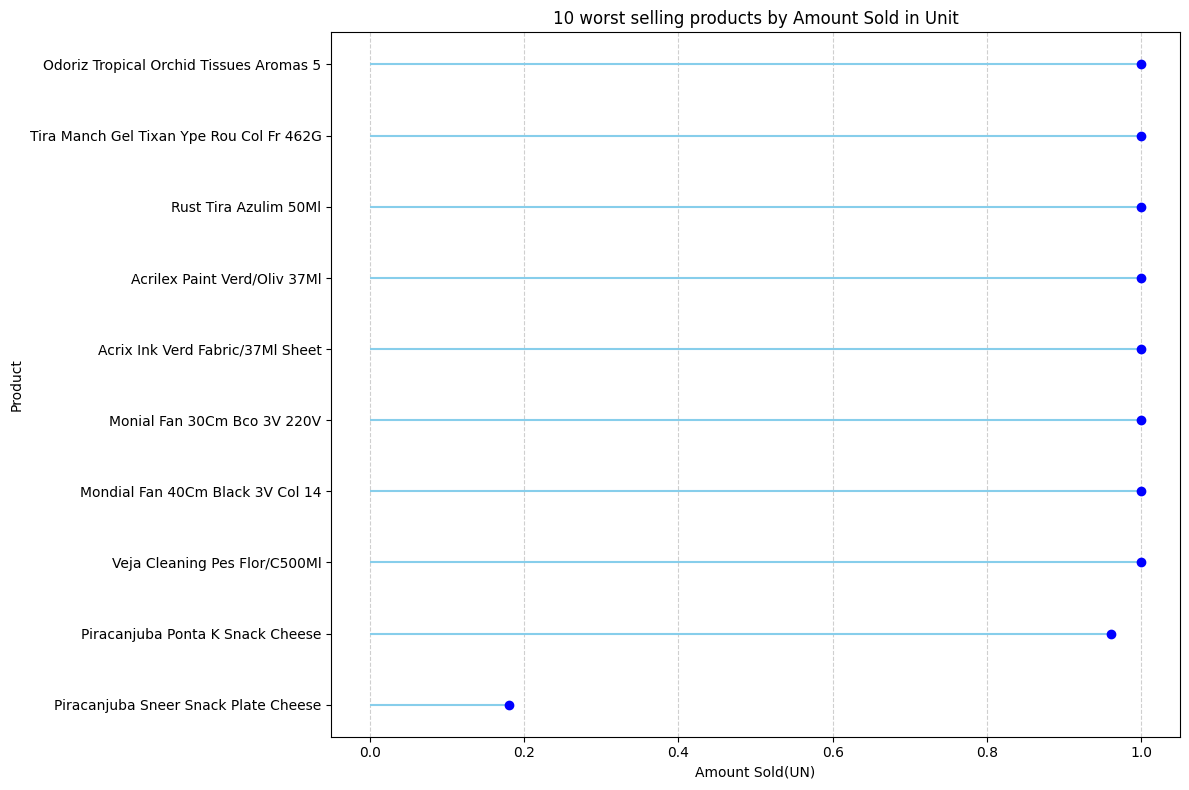

In [6]:
# Creating visualizations of the worst-selling products in KG and Unit

# Defining the variables
worst_selling_unit = unit.sort_values('Amount_Sold', ascending=True).head(10).copy()
worst_selling_kg = kg.sort_values('Amount_Sold', ascending=True).head(10).copy()

# Plotting the variable unit with Lollipop
# Lollipop charts help highlight differences in small values
plt.figure(figsize=(12, 8))
plt.hlines(y=worst_selling_unit['Description'], xmin=0, xmax=worst_selling_unit['Amount_Sold'], color='skyblue')
plt.plot(worst_selling_unit['Amount_Sold'], worst_selling_unit['Description'], "o", color='blue')
plt.xlabel("Amount Sold(UN)")
plt.ylabel("Product")
plt.title("10 worst selling products by Amount Sold in Unit")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6) # plotting grids vertically to help understand the data
plt.show()


# Plotting the variable kg with Treemap
# Treemaps are useful to show part-to-whole relationships with relative sizes
import plotly.express as px

fig = px.treemap(
    worst_selling_kg,
    path=['Description'],
    values='Amount_Sold',
    color='Amount_Sold',
    color_continuous_scale='Blues',
    title='10 worst selling products by Amount Sold in KG'
)
fig.update_traces(textinfo='label+value') # used to define what will be displayed inside each slice of the chart
fig.show()

📊Worst-Selling Products by Amount Sold

This chart shows the products with the lowest sales volume. Identifying these items is essential for reviewing inventory decisions, potential discontinuations, or exploring reasons behind their poor performance, such as pricing, placement, or seasonal trends.

In [7]:
# Printing the summary for the worst-selling products
print_summary_stats(worst_selling_unit, 'Amount_Sold', 'Unit')
print_summary_stats(worst_selling_kg, 'Amount_Sold', 'KG')


Summary Statistics for Unit:
Total Amount_Sold: 9.14
Mean Amount_Sold: 0.91
Median Amount_Sold: 1.00
Min Amount_Sold: 0.18
Max Amount_Sold: 1.00
Standard Deviation Amount_Sold: 0.26

Summary Statistics for KG:
Total Amount_Sold: 1.97
Mean Amount_Sold: 0.20
Median Amount_Sold: 0.21
Min Amount_Sold: 0.09
Max Amount_Sold: 0.32
Standard Deviation Amount_Sold: 0.09


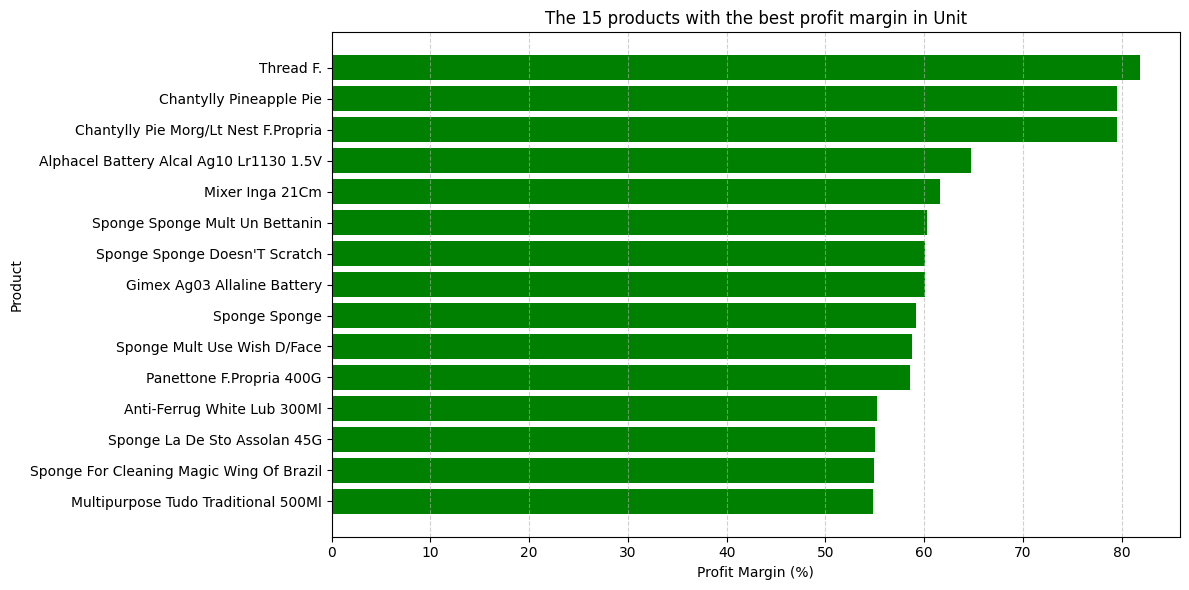

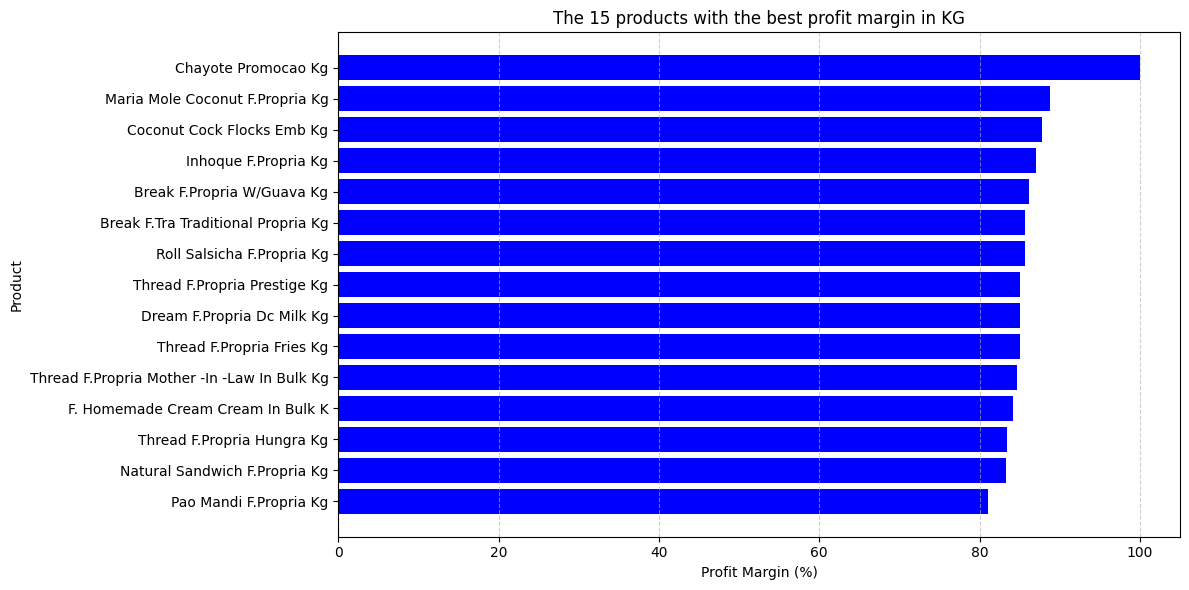

In [8]:
# Creating visualizations of the products with the best profit margin in unit and kg

# Separating the data
unit_profit = data[~data['Description'].str.contains('kg|k', case=False)].copy()
kg_profit = data[data['Description'].str.contains('kg|k', case=False)].copy()

# Defining the variables
best_profit_unit = unit_profit.sort_values('Margin%', ascending=False).head(15).copy()
best_profit_kg = kg_profit.sort_values('Margin%', ascending=False).head(15).copy()

# Plotting the variable unit with Horizontal Bar
# Bar is a good option for comparing numerical values across categories and horizontal helps in terms of
# readability, not having to plot a legend as in the first bar plot
plt.figure(figsize=(12, 6))
plt.barh(best_profit_unit['Description'], best_profit_unit['Margin%'], color='green')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Product')
plt.title('The 15 products with the best profit margin in Unit')
plt.gca().invert_yaxis() # Turning the highest margin at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plotting the variable kg with Horizontal Bar
plt.figure(figsize=(12, 6))
plt.barh(best_profit_kg['Description'], best_profit_kg['Margin%'], color='blue')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Product')
plt.title('The 15 products with the best profit margin in KG')
plt.gca().invert_yaxis() # Turning the highest margin at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

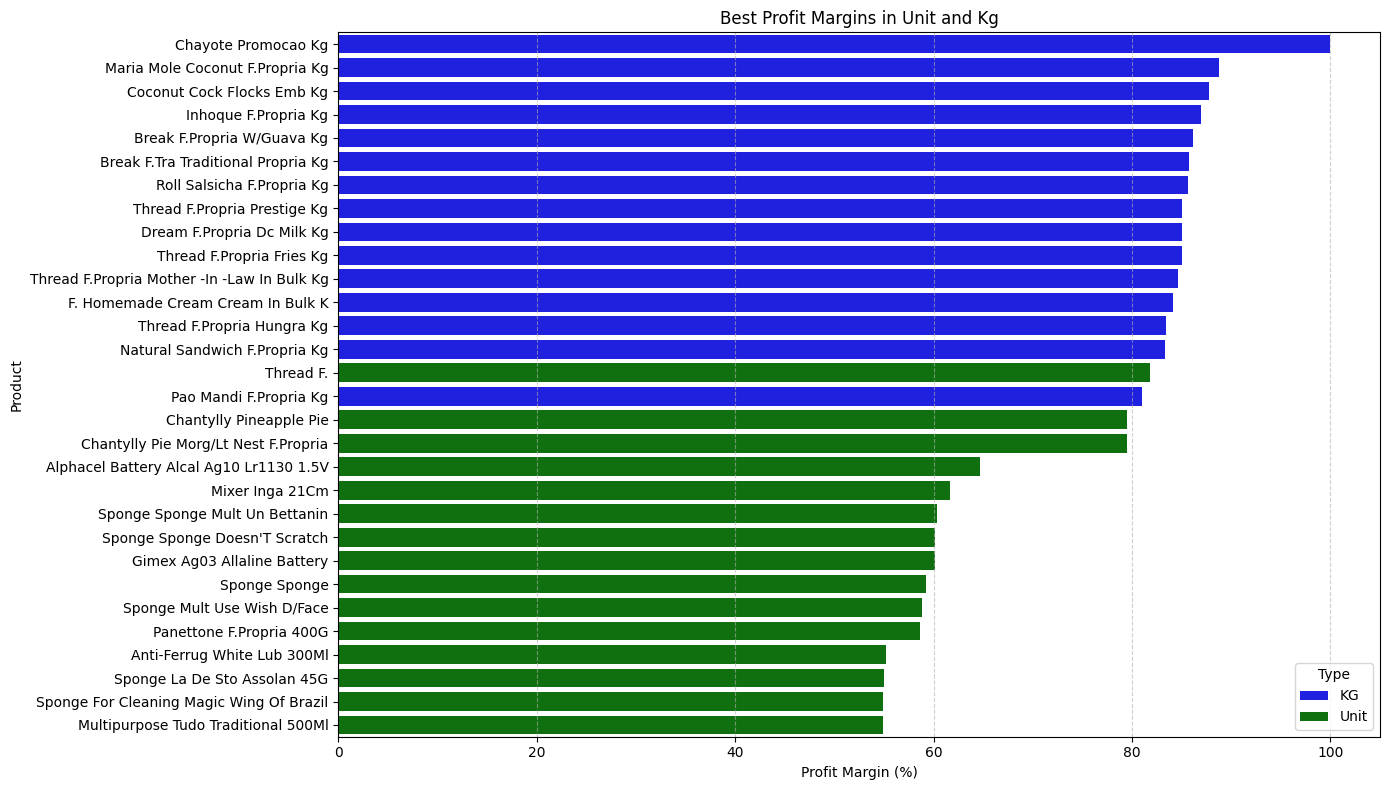

In [9]:
# We can clearly see that products per kg have a higher profit, however we can find an even better way to visualize all this
# together concatenating them

# Adding a Type column for clarity
best_profit_unit['Type'] = 'Unit'
best_profit_kg['Type'] = 'KG'

# Combining both
# pd.concat() creates a deep copy of the data, meaning that modifications to combined won't affect the original DataFrames
# ignore_index=True: This parameter resets the index in the resulting DataFrame. Instead of retaining the original indices
# from best_profit_unit and best_profit_kg.
combined = pd.concat([best_profit_unit, best_profit_kg], ignore_index=True)

# Sorting combined by Margin% for better order
combined = combined.sort_values('Margin%', ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(
    data=combined,
    y='Description',
    x='Margin%',
    hue='Type',  # Group by Unit vs KG
    palette=['blue', 'green']
)
plt.xlabel('Profit Margin (%)')
plt.ylabel('Product')
plt.title('Best Profit Margins in Unit and Kg')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(title='Type')
plt.show()

📊 Best Profit Margin Products

This chart highlights the products with the best profit margins. However, the ones that have contributed the most to the most profit relative to their cost, making them critical for maximizing overall profitability. Focusing on promoting these products can improve financial outcocmes.

In [10]:
# Defining the function for printing the margin summary
def print_summary_stats_margin(df, value_column, category_name):
    print(f"\nSummary Statistics for {category_name}:")
    mean = df[value_column].mean()
    median = df[value_column].median()
    min_val = df[value_column].min()
    max_val = df[value_column].max()
    std_dev = df[value_column].std()

    print(f"Mean {value_column}: {mean:,.2f}")
    print(f"Median {value_column}: {median:,.2f}")
    print(f"Min {value_column}: {min_val:,.2f}")
    print(f"Max {value_column}: {max_val:,.2f}")
    print(f"Standard Deviation {value_column}: {std_dev:,.2f}")

# Printing summary of best profit margin products
print_summary_stats_margin(best_profit_unit, 'Margin%', 'Unit')
print_summary_stats_margin(best_profit_kg, 'Margin%', 'KG')


Summary Statistics for Unit:
Mean Margin%: 62.96
Median Margin%: 60.10
Min Margin%: 54.86
Max Margin%: 81.81
Standard Deviation Margin%: 9.39

Summary Statistics for KG:
Mean Margin%: 86.18
Median Margin%: 85.00
Min Margin%: 80.99
Max Margin%: 100.00
Standard Deviation Margin%: 4.27


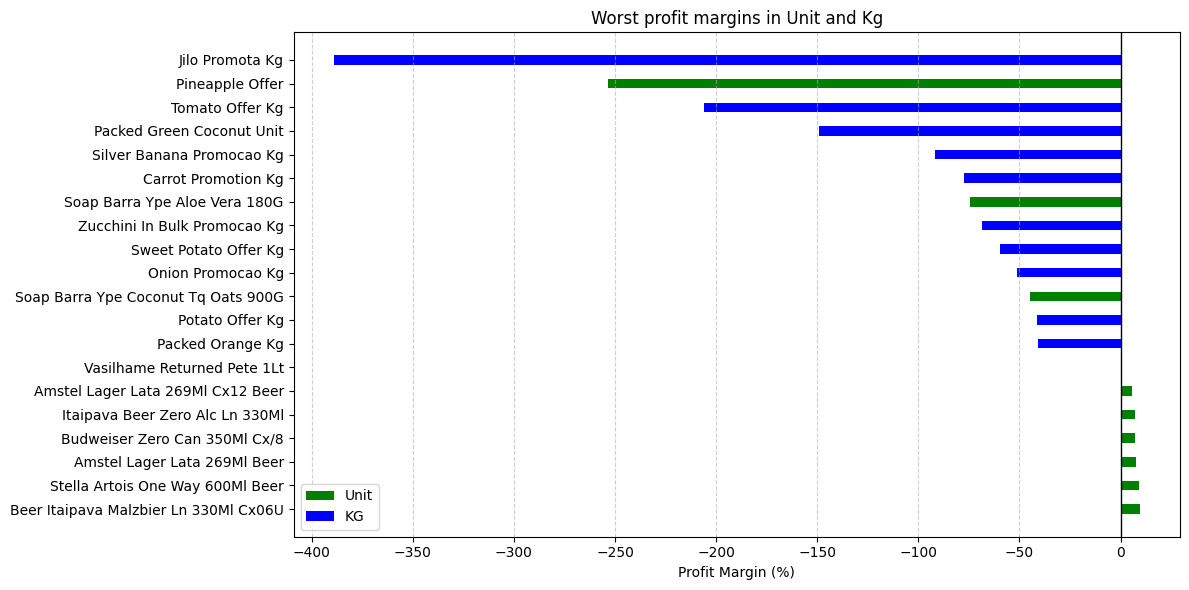

In [11]:
# Creating visualizations of the products with the worst profit margin in unit and kg

# Defining variables
worst_profit_unit = unit_profit.sort_values('Margin%', ascending=True).head(10).copy()
worst_profit_kg = kg_profit.sort_values('Margin%', ascending=True).head(10).copy()

# Adding type columns
worst_profit_unit['Type'] = 'Unit'
worst_profit_kg['Type'] = 'KG'

# Concatenating the columns and sorting their values
combined_worst = pd.concat([worst_profit_unit, worst_profit_kg], ignore_index=True)
combined_worst = combined_worst.sort_values('Margin%', ascending=False)

# Preparing data for bar
products = combined_worst['Description']
indices = np.arange(len(combined_worst))

# Extracting respective margins
unit_margins_worst = combined_worst[combined_worst['Type'] == 'Unit'].set_index('Description').reindex(products)['Margin%']
kg_margins_worst = combined_worst[combined_worst['Type'] == 'KG'].set_index('Description').reindex(products)['Margin%']

# Plotting
plt.figure(figsize=(12,6))
width = 0.4
plt.barh(indices, unit_margins_worst, width, label='Unit', color='green')
plt.barh(indices, kg_margins_worst, width, label='KG', color='blue')
plt.axvline(0, color='black', linewidth=1)
plt.yticks(indices, products)
plt.xlabel('Profit Margin (%)')
plt.title('Worst profit margins in Unit and Kg')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

📊 Worst Profit Margin Products

This chart illustrates the products with the lowest profit margins. These items may generate revenue but offer limited profitability. Recognizing them helps in evaluating whether to adjust pricing, renegotiate supply costs, reconsider offering these products or find out if these products are making a loss and if they are, figure out how it is happening to solve the problem.

In [12]:
# Printing summary of worst profit margin products
print_summary_stats_margin(worst_profit_unit, 'Margin%', 'Unit')
print_summary_stats_margin(worst_profit_kg, 'Margin%', 'KG')


Summary Statistics for Unit:
Mean Margin%: -32.68
Median Margin%: 6.34
Min Margin%: -253.54
Max Margin%: 9.45
Standard Deviation Margin%: 82.66

Summary Statistics for KG:
Mean Margin%: -117.43
Median Margin%: -72.84
Min Margin%: -389.02
Max Margin%: -40.74
Standard Deviation Margin%: 108.90


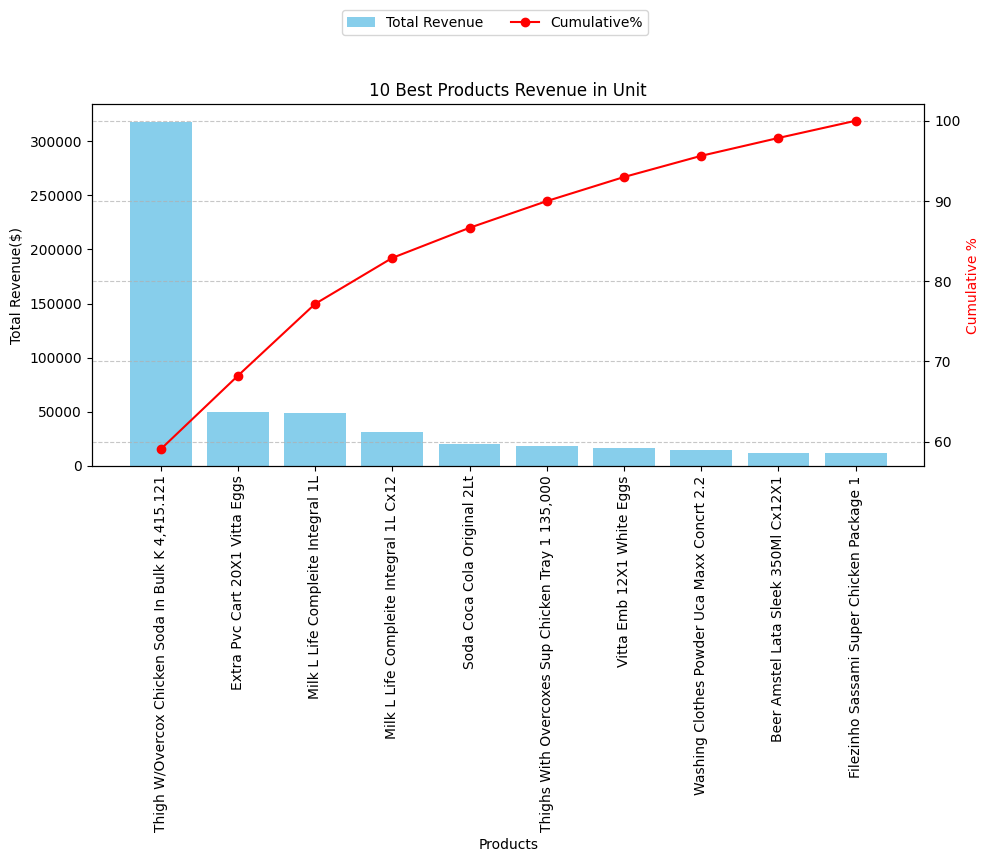

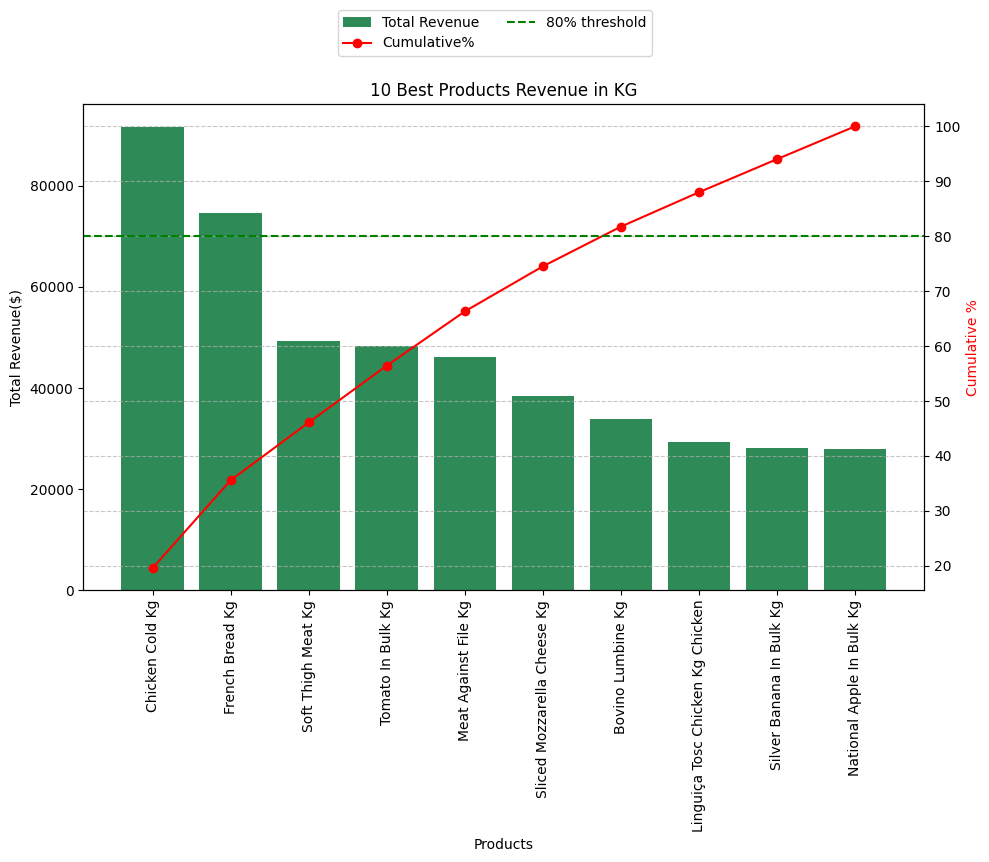

In [13]:
# Creating visualization of the best product recipes in unit and kg

# I used a Pareto chart to highlight top-selling products and their cumulative contribution, showing how a few items drive most of the revenue

# Defining the top 10 items in unit
best_revenue_unit = unit.sort_values('Total_Sale', ascending=False).head(10).copy()
best_revenue_kg = kg.sort_values('Total_Sale', ascending=False).head(10).copy()

# Cumulative percentage
# .cumsum() adds up the Total_Sale values progressively from top to bottom
best_revenue_unit['Cumulative_Percentage'] = best_revenue_unit['Total_Sale'].cumsum() / best_revenue_unit['Total_Sale'].sum() * 100
best_revenue_kg['Cumulative_Percentage'] = best_revenue_kg['Total_Sale'].cumsum() / best_revenue_kg['Total_Sale'].sum() * 100

# Plotting unit
fig, ax1 = plt.subplots(figsize=(10, 8))
bars = ax1.bar(best_revenue_unit['Description'], best_revenue_unit['Total_Sale'], color='skyblue', label='Total Revenue')
ax1.set_xlabel('Products')
ax1.set_ylabel('Total Revenue($)')
ax1.set_title('10 Best Products Revenue in Unit')
ax1.tick_params(axis='x', rotation=90)

# ax2 = ax1.twinx() Creates a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
line, = ax2.plot(best_revenue_unit['Description'], best_revenue_unit['Cumulative_Percentage'], color='red', marker='o', label='Cumulative%')
ax2.set_ylabel('Cumulative %', color='red')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Combined legend above the title
fig.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.08),  # Centered horizontally, above the top of the plot
    ncol=2,  # Optional: show legend items in one row
    frameon=True  # Optional: remove box around the legend
)

plt.show()


# Plotting kg
fig, ax1 = plt.subplots(figsize=(10, 8))
bars = ax1.bar(best_revenue_kg['Description'], best_revenue_kg['Total_Sale'], color='seagreen', label='Total Revenue')
ax1.set_xlabel('Products')
ax1.set_ylabel('Total Revenue($)')
ax1.set_title('10 Best Products Revenue in KG')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
line, = ax2.plot(best_revenue_kg['Description'], best_revenue_kg['Cumulative_Percentage'], color='red', marker='o', label='Cumulative%')
ax2.set_ylabel('Cumulative %', color='red')

ax2.axhline(80, color='green', linestyle='--', label='80% threshold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor = (0.5, 1.08), ncol=2, frameon=True)
plt.show()

📊 Best Revenue Products

This chart shows the products with the highest revenue-generating, combining both sales, volume and price. These products are crucial to the financial business's success and should be prioritized for marketing and stock availability, although do not disregard other resources when analysing product efficiency.

In [14]:
# Printing summary of best revenue products
print_summary_stats(best_revenue_unit, 'Total_Sale', 'Unit')
print_summary_stats(best_revenue_kg, 'Total_Sale', 'KG')


Summary Statistics for Unit:
Total Total_Sale: 539,152.15
Mean Total_Sale: 53,915.22
Median Total_Sale: 19,088.34
Min Total_Sale: 11,570.00
Max Total_Sale: 318,298.08
Standard Deviation Total_Sale: 93,958.02

Summary Statistics for KG:
Total Total_Sale: 467,443.24
Mean Total_Sale: 46,744.32
Median Total_Sale: 42,256.41
Min Total_Sale: 27,922.56
Max Total_Sale: 91,549.52
Standard Deviation Total_Sale: 21,189.42


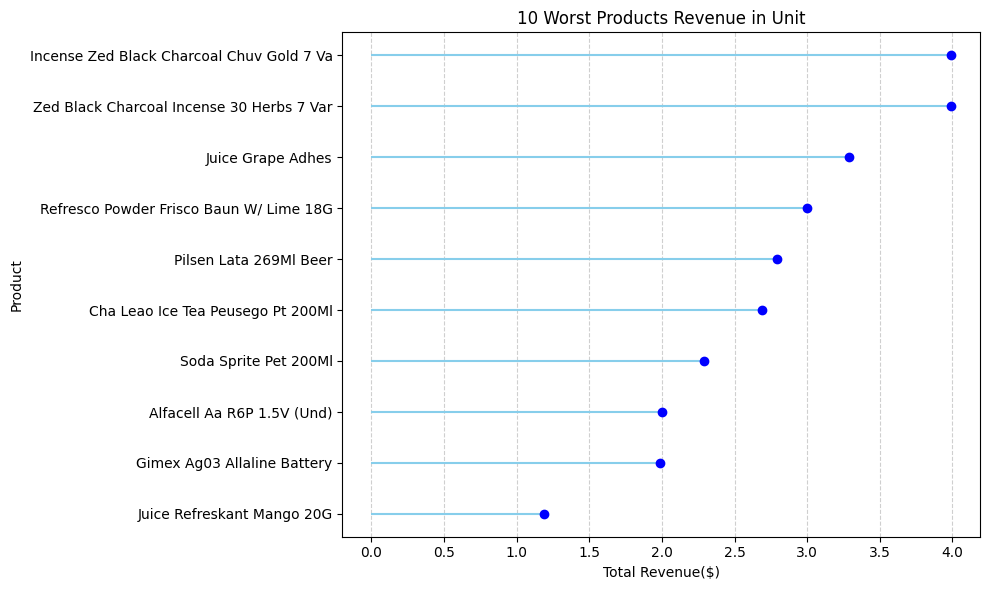

In [15]:
# Creating visualization of the worst product recipes in unit and kg

# Defining variables
worst_revenue_unit = unit.sort_values('Total_Sale', ascending=True).head(10).copy()
worst_revenue_kg = kg.sort_values('Total_Sale', ascending=True).head(10).copy()

# Plotting unit
# # I used a lollipop chart for a clean, clear view of the worst-selling products, showcasing minimalist and effective visualization
plt.figure(figsize=(10, 6))
plt.hlines(y=worst_revenue_unit['Description'], xmin=0, xmax=worst_revenue_unit['Total_Sale'], color='skyblue')
plt.plot(worst_revenue_unit['Total_Sale'], worst_revenue_unit['Description'], "o", color='blue')
plt.xlabel("Total Revenue($)")
plt.ylabel("Product")
plt.title("10 Worst Products Revenue in Unit")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plotting kg
fig = px.treemap(
    worst_revenue_kg,
    path=['Description'],
    values='Total_Sale',
    color='Total_Sale',
    color_continuous_scale='Blues',
    title='10 Worst Products Revenue in Kg'
)
fig.update_traces(textinfo='label+value') # used to define what will be displayed inside each slice of the chart
fig.show()

📊 Worst Revenue-Generating Products

This chart shows the products with the lowest total revenue contribution. While they may sell in small quantities or at low prices, analyzing these items is important to determine if they serve a strategic role or should be phased out to optimize inventory.

In [16]:
# Printing summary of worst revenue products
print_summary_stats(worst_revenue_unit, 'Total_Sale', 'Unit')
print_summary_stats(worst_revenue_kg, 'Total_Sale', 'KG')


Summary Statistics for Unit:
Total Total_Sale: 27.22
Mean Total_Sale: 2.72
Median Total_Sale: 2.74
Min Total_Sale: 1.19
Max Total_Sale: 3.99
Standard Deviation Total_Sale: 0.90

Summary Statistics for KG:
Total Total_Sale: 67.77
Mean Total_Sale: 6.78
Median Total_Sale: 5.78
Min Total_Sale: 3.22
Max Total_Sale: 10.09
Standard Deviation Total_Sale: 2.35


In [17]:
# Now we are gonna normalize some features of our data set so that we can split all products into different groups, defining whether they are worth selling

# The first step is to create a profit feature and in favour of doing it thoroughly, we will create the total and per unit profit
data['Unit_Profit'] = data['Unit_Price'] - data['Unit_Cost']
data['Total_Profit'] = data['Total_Sale'] - data['Total_Cost']

data.head()

,Code,Description,Unit_Cost,Unit_Price,Amount_Sold,Margin%,Total_Cost,Total_Sale,Unit_Profit,Total_Profit
0,24513,Avocado In Bulk Kg,5.04,8.39,267.42,40.01,1346.60,2244.54,3.35,897.94
1,25049,Pineapple Unit,3.73,4.91,986.00,24.05,3674.41,4837.92,1.18,1163.51
2,72665,Pineapple Offer,3.50,0.99,9.00,-253.54,31.50,8.91,-2.51,-22.59
3,24541,Pumpkin Cabotia In Bulk Kg,1.18,1.66,1474.74,28.46,1746.97,2442.07,0.48,695.10
4,63614,Pumpkin Cabotia Packed Kg,1.20,2.46,502.74,51.29,601.59,1235.17,1.26,633.58


In [18]:
# Normalizing the features
from sklearn.preprocessing import StandardScaler

metrics = ['Amount_Sold', 'Total_Sale', 'Margin%', 'Total_Profit']
scaler = StandardScaler()
data[[f'{col}_Norm' for col in metrics]] = scaler.fit_transform(data[metrics])

In [19]:
# Defining categories based on the metrics
norm_metrics = [f'{col}_Norm' for col in metrics]
data['Composite_Store'] = data[norm_metrics].mean(axis=1)

def categorize(score):
    if score >= 0.75:
        return 'A'
    elif score >= 0.5:
        return 'B'
    elif score >= 0.25:
        return 'C'
    else:
        return 'D'

data['Category'] = data['Composite_Store'].apply(categorize)

data.head()

,Code,Description,Unit_Cost,Unit_Price,Amount_Sold,Margin%,Total_Cost,Total_Sale,Unit_Profit,Total_Profit,Amount_Sold_Norm,Total_Sale_Norm,Margin%_Norm,Total_Profit_Norm,Composite_Store,Category
0,24513,Avocado In Bulk Kg,5.04,8.39,267.42,40.01,1346.60,2244.54,3.35,897.94,0.321823,0.111857,0.135066,0.059343,0.157023,D
1,25049,Pineapple Unit,3.73,4.91,986.00,24.05,3674.41,4837.92,1.18,1163.51,1.829975,0.430351,-0.728889,0.102651,0.408522,C
2,72665,Pineapple Offer,3.50,0.99,9.00,-253.54,31.50,8.91,-2.51,-22.59,-0.220547,-0.162702,-15.755535,-0.090770,-4.057389,D
3,24541,Pumpkin Cabotia In Bulk Kg,1.18,1.66,1474.74,28.46,1746.97,2442.07,0.48,695.10,2.855740,0.136116,-0.490164,0.026266,0.631989,B
4,63614,Pumpkin Cabotia Packed Kg,1.20,2.46,502.74,51.29,601.59,1235.17,1.26,633.58,0.815712,-0.012104,0.745681,0.016234,0.391381,C


In [21]:
data_class_a.shape

(59, 16)

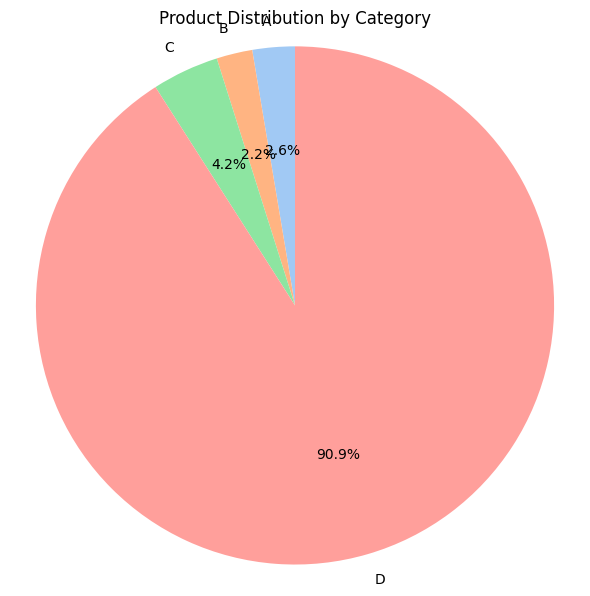

In [22]:
# Plotting the distribution of product categories (A, B, C, D) as a pie chart

# Counting the number of products in each category
category_counts = data['Category'].value_counts().sort_index()

# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Product Distribution by Category')
plt.axis('equal')# Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.show()


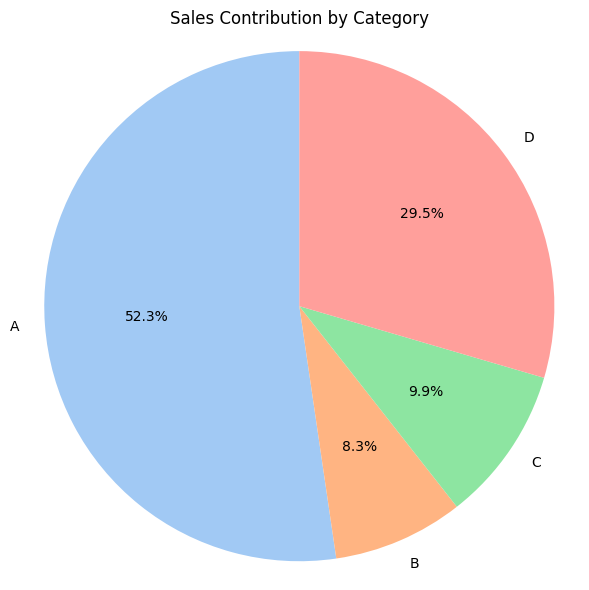

In [23]:
# Calculate total sales per category
sales_by_category = data.groupby('Category')['Total_Sale'].sum().sort_index()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sales_by_category.values,
    labels=sales_by_category.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)

# Add title
plt.title('Sales Contribution by Category')

# Keep the pie circular
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()


Through product categorization, we have established a solid foundation to identify which products perform best overall, based on a composite score derived from the most important features in the dataset, including sales volume, revenue, profit margins, and total profit.

Out of the total 2232 products analyzed, 59 products (approximately 2.64%) emerged as key performers. These products contribute disproportionately to overall revenue and profitability, indicating that they should be prioritized in marketing campaigns and consistently maintained in stock to ensure steady sales and customer satisfaction.

This categorization also enables the formulation of targeted strategies for each product group:

Top performers (Category A) → should receive maximum visibility, strategic promotions, and optimized inventory management.

Mid-tier products (Categories B and C) → may benefit from promotional campaigns or bundling strategies to enhance their performance.

Low performers (Category D) → should be evaluated for potential discontinuation, price adjustments, or repositioning in the market.

By leveraging this categorization framework, the business can make data-driven decisions to improve profitability, optimize product assortment, and enhance overall operational efficiency.

